# **Hoja de Trabajo 1 - Visión por Computadora**

- Paula Barillas - 22764
- Gerardo Pineda -
- Mónica Salvatierra - 22249

Link del repositorio: https://github.com/alee2602/HDT1-VPC


## **Task 1 - Análisis Teórico**

Considere cada uno de los siguientes escenarios y responda según corresponda:

1. Como director de un proyecto de conducción autónoma, debe dimensionar el hardware para un
nuevo vehículo. El sistema utiliza 8 cámaras que capturan video a resolución 4K UHD (3840 x 2160).
Debido a la necesidad de alto rango dinámico (HDR), los sensores operan a 12 bits por píxel (Raw
Bayer Pattern) a 60 FPS.Métrica A: Enfocada puramente en el flujo vehicular.

 **a. Calcule el tamaño exacto de una sola imagen (frame) cruda en Megabytes (MB).**

![inciso a](img/IMG_3679.jpg)

 **b. Calcule el ancho de banda necesario (en Gbps) para transmitir el flujo de las 8 cámaras al procesador central sin compresión.**

 ![inciso b](img/IMG_3680.jpg)

 **c. Si su procesador tiene una memoria RAM reservada de 16 GB exclusivamente para el buffer
de video, ¿cuántos segundos de historia puede almacenar antes de empezar a sobrescribir datos?**

![inciso c](img/IMG_3681.jpg)

 **d. Basado en su resultado, ¿es viable enviar estos datos "crudos" a la nube en tiempo real
usando 5G? Justifique.**

- Realmente no es viable, enviar datos crudos a la nube por 5G, porque el flujo supera ampliamente las capacidades reales de una red 5G (1–3 Gbps en movilidad, máx. teórico 20 Gbps), y además la latencia y la variabilidad de red no cumplen los requisitos críticos de seguridad para conducción autónoma.

**2. Considere un píxel con valor de intensidad Iin=50 en una imagen estándar de 8 bits (0−255). Se
aplican dos procesos de mejora secuenciales en el siguiente orden:**

**I. Corrección Gamma con γ=0.5 (para expandir sombras).**

**II. Ajuste Lineal con ganancia α=1.2 y brillo β=-10 (para contrastar).**

Realice los cálculos en el dominio de flotantes normalizados [0,1] como dicta la buena práctica y
convierta a entero de 8 bits solo al final.

 

**3. Usted está programando un robot clasificador de pelotas. Tiene dos objetos: una pelota roja brillante bajo el sol R_rgb=(255,0,0) y la misma pelota roja en una sombra profunda S_rgb=(50,0,0)**

## **Task 2 - Práctica**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def show_img(img, title="Imagen", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    # TODO: Matplotlib espera RGB, OpenCV carga BGR.
    # Verifica si la imagen tiene 3 canales y conviértela para visualización correcta.
    if len(img.shape) == 3 and cmap is None:
        img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_show = img
    
    plt.imshow(img_show, cmap=cmap)
    plt.axis('off')
    plt.show()

def manual_contrast_brightness(image, alpha, beta):
    """
    Aplica g(x) = alpha * f(x) + beta de forma segura.
    Args:
        image: numpy array uint8
        alpha: float (contraste)
        beta: float (brillo)
    Returns:
        numpy array uint8
    """
    # RETO 1: Implementar pipeline seguro
    # 1. Convertir a float32 y normalizar a [0, 1]
    # 2. Aplicar fórmula matemática vectorizada (Sin bucles for)
    # 3. Aplicar np.clip para evitar valores fuera de rango
    # 4. Des-normalizar (x255) y castear a uint8
    
    # TODO: Escribir código aquí
    img = image.astype(np.float32) / 255.0
    img = alpha * img + (beta / 255.0)
    img = np.clip(img, 0.0, 1.0)
    processed_img = (img * 255.0).astype(np.uint8)
    # processed_img = np.zeros_like(image) # Placeholder
    return processed_img

def manual_gamma_correction(image, gamma):
    """
    Aplica V_out = V_in ^ gamma
    """
    # RETO 2: Implementar corrección Gamma
    # Recordar: La operación potencia es costosa. 
    # Usar Look-Up Table (LUT) es una optimización común, pero aquí usa matemáticas directas en float.
    
    # TODO: Escribir código aquí
    img = image.astype(np.float32) / 255.0
    img = np.power(img, gamma)
    img = np.clip(img, 0.0, 1.0)
    gamma_img = (img * 255.0).astype(np.uint8)
    return gamma_img

def hsv_segmentation(image):
    """
    Segmentar un objeto de color específico (ej. verde o rojo)
    """
    # 1. Convertir a HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # RETO 3: Definir rangos para un color.
    # OJO: En OpenCV Hue es [0, 179].
    # Ejemplo: Si buscas verde, H está alrededor de 60 (en escala 0-179).
    # TODO: Definir lower_bound y upper_bound (np.array)
    lower_bound = np.array([35, 50, 50])
    upper_bound = np.array([85, 255, 255])
    
    # Crear máscara
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    
    # Aplicar máscara a la imagen original (bitwise_and)
    result = cv2.bitwise_and(image, image, mask=mask)
    return result

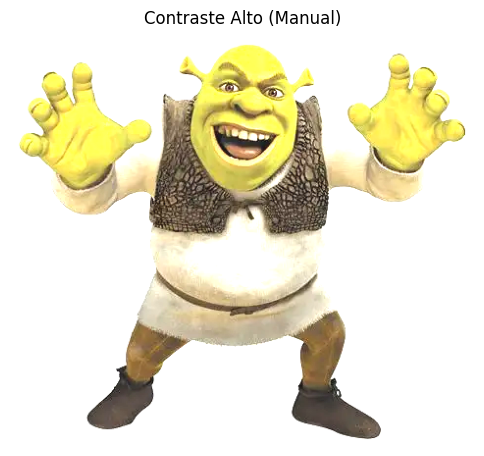

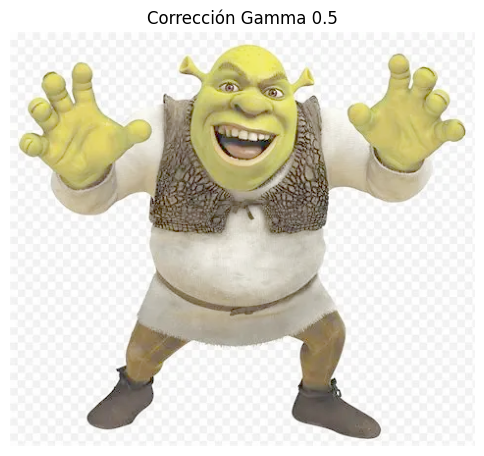

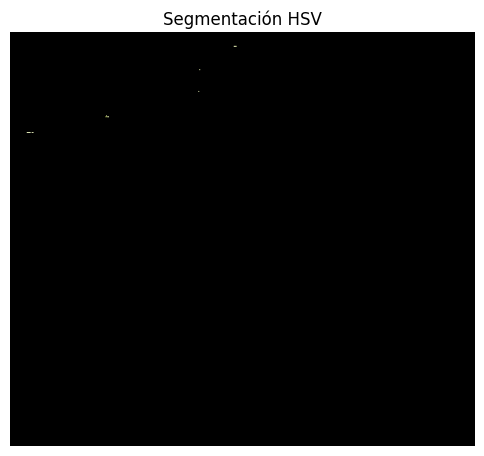

In [9]:
img = cv2.imread('img/sample.png')
    
if img is None:
    print("Error: No se encontró la imagen.")
else:
    # 1. Prueba de Contraste
    contrast_img = manual_contrast_brightness(img, 1.5, 20)
    show_img(contrast_img, "Contraste Alto (Manual)")
    
    # # 2. Prueba de Gamma
    gamma_img = manual_gamma_correction(img, 0.5) # Aclarar sombras
    show_img(gamma_img, "Corrección Gamma 0.5")
    
    # # 3. Segmentación
    seg_img = hsv_segmentation(img)
    show_img(seg_img, "Segmentación HSV")

## **Task 3 Preguntas Post-Práctica**